In [1]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 92.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
 import nltk
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
data=pd.read_csv('train_en.txt',sep='\t')

In [5]:
data

,Sentence,Style,User
0,Cute interior and owner (?) gave us tour of up...,positive,bcjbaE6dDog4jkNY91ncLQ
1,I've been to this location many times when I l...,negative,enaHB1e956thdnafcHVAig
2,My food only merited maybe two stars but I wil...,negative,07aVWNhBhpwqW3MdqoKDKQ
3,After trying a few ramen places with crazy var...,negative,OkjeFppodgJP_CvB84cJYw
4,I cannot even believe someone gave this place ...,positive,7Ie0VmQtnGYUVq2YW4dTVw
...,...,...,...
342900,So I've belonged to a gym for YEARS and I fina...,positive,O5y7KlfBdqV6Ih8yhjZLsg
342901,"ice cream! ice cream sodas, sundaes!! \n\nwant...",positive,7ziWZULyiZv2TesYNMFf4g
342902,This is a good pizza option - they deliver thr...,negative,MCzlzlOw7IGbRAKVjJBPtg
342903,Don't misinterpret my 5-star review....I don't...,positive,x1QLCwZGFAjxRRw4EHc3-g


In [24]:
data.drop(columns=['User'],inplace=True)

In [25]:

data['Tokens'] = data['Sentence'].apply(lambda x: word_tokenize(x))

In [26]:
sentences = data['Tokens'].values.tolist()

In [27]:
model = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=1)

In [28]:
model.wv.index_to_key

['.',
 'the',
 ',',
 'and',
 'I',
 'a',
 'to',
 'was',
 'of',
 'is',
 'it',
 'for',
 '!',
 'in',
 'The',
 'with',
 'you',
 'that',
 'but',
 "'s",
 'have',
 'on',
 'my',
 "n't",
 'are',
 'they',
 'this',
 'had',
 'were',
 'not',
 'place',
 'good',
 'so',
 'at',
 'food',
 'be',
 'here',
 'as',
 'we',
 ')',
 'It',
 '(',
 'great',
 'very',
 'out',
 'like',
 'there',
 'They',
 'all',
 'We',
 'me',
 'get',
 'their',
 'just',
 'do',
 'time',
 'or',
 'one',
 'from',
 'really',
 'back',
 'which',
 'up',
 'can',
 'an',
 'go',
 'some',
 'if',
 'This',
 'would',
 "'ve",
 'did',
 'also',
 'been',
 'your',
 'about',
 'service',
 'more',
 'will',
 'when',
 'our',
 'has',
 '...',
 '$',
 'My',
 'got',
 'only',
 'nice',
 "'m",
 'always',
 'what',
 '-',
 'too',
 'other',
 'by',
 'because',
 '?',
 'well',
 'little',
 'them',
 'try',
 'ordered',
 'love',
 'delicious',
 'order',
 'than',
 'friendly',
 'menu',
 'chicken',
 ':',
 'pretty',
 'no',
 'even',
 'could',
 'best',
 'much',
 "''",
 'staff',
 '``',
 '

In [29]:
len(model.wv.index_to_key)

33371

In [30]:
len(model.wv.vectors)

33371

In [31]:
words = model.wv.index_to_key
word_vectors = model.wv.vectors

In [32]:
tsne = TSNE(n_components=2,random_state=42)

In [33]:
word_vectors_2d = tsne.fit_transform(word_vectors[:50])

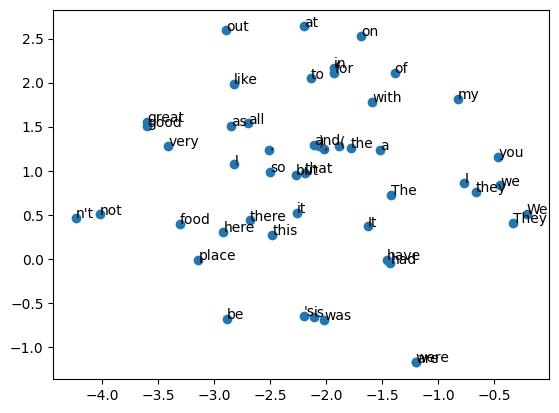

In [34]:
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for label, x, y in zip(words[:50], word_vectors_2d[:, 0], word_vectors_2d[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [37]:
def differences(model):


      result1 = model.wv.most_similar(positive=['Paris', 'Italy'], negative=['France'])
      print(f"Paris - France + Italy = {result1[0]}")


      result2 = model.wv.most_similar(positive=['Madrid', 'France'], negative=['Spain'])
      print(f"Madrid - Spain + France = {result2[0]}")


      result3 = model.wv.most_similar(positive=['King', 'Woman'], negative=['Man'])
      print(f"King - Man + Woman = {result3[0]}")


      result4 = model.wv.most_similar(positive=['Bigger', 'Cold'], negative=['Big'])
      print(f"Bigger - Big + Cold = {result4[0]}")


      result5 = model.wv.most_similar(positive=['Windows', 'Google'], negative=['Microsoft'])
      print(f"Windows - Microsoft + Google = {result5[0]}")



In [38]:
differences(model)

Paris - France + Italy = ('NYC', 0.6498230695724487)
Madrid - Spain + France = ('Newport', 0.7052814960479736)
King - Man + Woman = ('Bashas', 0.580117404460907)
Bigger - Big + Cold = ('Pricier', 0.6164250373840332)
Windows - Microsoft + Google = ('google', 0.5187676548957825)


In [42]:
#CBOW

In [39]:
model = Word2Vec(sentences, vector_size=100, window=3, min_count=15, sg=0)

In [41]:
differences(model)

Paris - France + Italy = ('Miami', 0.6923101544380188)
Madrid - Spain + France = ('Bensalem', 0.6934227347373962)
King - Man + Woman = ('Meadowood', 0.6000049114227295)
Bigger - Big + Cold = ('weaker', 0.6601375341415405)
Windows - Microsoft + Google = ('google', 0.5821342468261719)


In [43]:
#Different vector size

In [45]:
model = Word2Vec(sentences, vector_size=50, window=3, min_count=15, sg=1)

In [46]:
differences(model)

Paris - France + Italy = ('Brooklyn', 0.760600209236145)
Madrid - Spain + France = ('L.A.', 0.7789642214775085)
King - Man + Woman = ('Tile', 0.7015331387519836)
Bigger - Big + Cold = ('weaker', 0.6895859837532043)
Windows - Microsoft + Google = ('Dives', 0.6601070761680603)


In [47]:
#EX.2

In [48]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [49]:
words

['.',
 'the',
 ',',
 'and',
 'I',
 'a',
 'to',
 'was',
 'of',
 'is',
 'it',
 'for',
 '!',
 'in',
 'The',
 'with',
 'you',
 'that',
 'but',
 "'s",
 'have',
 'on',
 'my',
 "n't",
 'are',
 'they',
 'this',
 'had',
 'were',
 'not',
 'place',
 'good',
 'so',
 'at',
 'food',
 'be',
 'here',
 'as',
 'we',
 ')',
 'It',
 '(',
 'great',
 'very',
 'out',
 'like',
 'there',
 'They',
 'all',
 'We',
 'me',
 'get',
 'their',
 'just',
 'do',
 'time',
 'or',
 'one',
 'from',
 'really',
 'back',
 'which',
 'up',
 'can',
 'an',
 'go',
 'some',
 'if',
 'This',
 'would',
 "'ve",
 'did',
 'also',
 'been',
 'your',
 'about',
 'service',
 'more',
 'will',
 'when',
 'our',
 'has',
 '...',
 '$',
 'My',
 'got',
 'only',
 'nice',
 "'m",
 'always',
 'what',
 '-',
 'too',
 'other',
 'by',
 'because',
 '?',
 'well',
 'little',
 'them',
 'try',
 'ordered',
 'love',
 'delicious',
 'order',
 'than',
 'friendly',
 'menu',
 'chicken',
 ':',
 'pretty',
 'no',
 'even',
 'could',
 'best',
 'much',
 "''",
 'staff',
 '``',
 '

In [50]:
data.head()

,Sentence,Style,Tokens
0,Cute interior and owner (?) gave us tour of up...,positive,"[Cute, interior, and, owner, (, ?, ), gave, us..."
1,I've been to this location many times when I l...,negative,"[I, 've, been, to, this, location, many, times..."
2,My food only merited maybe two stars but I wil...,negative,"[My, food, only, merited, maybe, two, stars, b..."
3,After trying a few ramen places with crazy var...,negative,"[After, trying, a, few, ramen, places, with, c..."
4,I cannot even believe someone gave this place ...,positive,"[I, can, not, even, believe, someone, gave, th..."


In [52]:
vocab_size = len(words)
embedding_dim = model.wv.vector_size

In [53]:
word_to_index = {}
word_to_index["<PAD>"] = 0
word_to_index["<UNK>"] = 1

In [54]:
embedding_matrix = np.zeros((vocab_size + 2, embedding_dim))

In [56]:
for i, word in enumerate(model.wv.index_to_key):
    new_index = i + 2
    word_to_index[word] = new_index
    embedding_matrix[new_index] = model.wv[word]

In [60]:
sequences_of_indices_train = []
for sentence_tokens in sentences:
    seq = []
    for word in sentence_tokens:
        index = word_to_index.get(word, 1)
        seq.append(index)
    sequences_of_indices_train.append(seq)

In [62]:
lengths = [len(s) for s in sequences_of_indices_train]
mean_len = int(np.mean(lengths))

In [63]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04554747,  0.21173528,  0.12255271, ..., -0.28804356,
        -0.10373072,  0.2962065 ],
       ...,
       [-0.326603  ,  0.3846359 , -0.26318887, ..., -0.34004313,
         0.38408306,  0.1321432 ],
       [-0.01718799, -0.33599707, -0.30105832, ..., -0.48150778,
        -0.08307474,  0.44036627],
       [-0.15019406,  0.00916866, -0.10041042, ..., -0.41217586,
        -0.0252254 ,  0.42621285]])

In [110]:
X_train = pad_sequences(
    sequences_of_indices_train,
    maxlen=mean_len,

)

In [67]:
labels = [1 if label=='negative' else 0 for label in data['Style']]
labels

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [68]:
model=Sequential()

In [73]:
model.add(Embedding(
    input_dim=len(words)+2,
    output_dim=50,
    weights=[embedding_matrix],
    input_length=mean_len,
    trainable=True
))

In [74]:
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [76]:
model.fit(X_train, np.array(labels), epochs=5)

Epoch 1/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - loss: 0.5303
Epoch 2/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.3833
Epoch 3/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.3624
Epoch 4/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - loss: 0.3474
Epoch 5/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - loss: 0.3301


In [77]:
test_data=pd.read_csv("test_en.txt",sep='\t')

In [78]:
test_data.drop(columns=['User'],inplace=True)

In [80]:

test_data['Tokens'] = test_data['Sentence'].apply(lambda x: word_tokenize(x))

In [82]:
test_sentences = test_data['Tokens'].values.tolist()
sequences_of_indices_test = []

for sentence_tokens in test_sentences:
    seq = []
    for word in sentence_tokens:
        index = word_to_index.get(word, 1)
        seq.append(index)
    sequences_of_indices_test.append(seq)

In [83]:
X_test = pad_sequences(
    sequences_of_indices_test,
    maxlen=mean_len,

)

In [86]:
y_pred_prob=model.predict(X_test)

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


In [87]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [88]:
test_data.head()

,Sentence,Style,Tokens
0,The hubby and I have been here on multiple occ...,positive,"[The, hubby, and, I, have, been, here, on, mul..."
1,Meh is all I can say for TDS. The restaurant i...,negative,"[Meh, is, all, I, can, say, for, TDS, ., The, ..."
2,I stopped in because I was hungry for some sna...,positive,"[I, stopped, in, because, I, was, hungry, for,..."
3,Here's an update for my further Comcast experi...,negative,"[Here, 's, an, update, for, my, further, Comca..."
4,My wife bought a car here. I handled the nego...,negative,"[My, wife, bought, a, car, here, ., I, handled..."


In [89]:
y_test=[1 if label=='negative' else 0 for label in test_data['Style']]

In [134]:
def evaluate_model(model, X_test, y_test):

    y_pred_prob = model.predict(X_test)

    y_pred = (y_pred_prob > 0.5).astype(int)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }
    return metrics

In [97]:
evaluate_model(model,X_test,y_test)

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


{'accuracy': 0.8620754012691303,
 'precision': 0.7648284845853235,
 'recall': 0.733244525851303,
 'f1_score': 0.7487035620164924}

In [95]:
#From first training
# 10716/10716 ━━━━━━━━━━━━━━━━━━━━ 95s 8ms/step - loss: 0.5303
# Epoch 2/5
# 10716/10716 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.3833
# Epoch 3/5
# 10716/10716 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.3624
# Epoch 4/5
# 10716/10716 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - loss: 0.3474
# Epoch 5/5
# 10716/10716 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - loss: 0.3301


In [98]:
from keras.optimizers import Adam

In [123]:
#High learning rate and more epochs

In [128]:
model=Sequential()

In [129]:
model.add(Embedding(
        input_dim=len(word_to_index),
        output_dim=50,
        weights=[embedding_matrix],
        trainable=True
    ))

In [130]:
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.02)
model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
    )

In [131]:
model.fit(X_train, np.array(labels), epochs=10)


Epoch 1/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 96s 9ms/step - loss: 0.4102
Epoch 2/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 92s 9ms/step - loss: 0.3915
Epoch 3/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 92s 9ms/step - loss: 0.3960
Epoch 4/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - loss: 0.4049
Epoch 5/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 92s 9ms/step - loss: 0.4122
Epoch 6/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - loss: 0.4043
Epoch 7/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 106s 10ms/step - loss: 0.4023
Epoch 8/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 95s 9ms/step - loss: 0.4023
Epoch 9/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 95s 9ms/step - loss: 0.3984
Epoch 10/10
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 141s 9ms/step - loss: 0.3943


In [135]:
evaluate_model(model,X_test,y_test)

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


{'accuracy': 0.8237448674878686,
 'precision': 0.6982559174230291,
 'recall': 0.653317792023978,
 'f1_score': 0.6750397866574906}

In [136]:
#We get worse results, and also higher loss at the end.

In [ ]:
#More neurons and smaller learning rate

In [137]:
model=Sequential()

In [138]:
model.add(Embedding(
        input_dim=len(word_to_index),
        output_dim=50,
        weights=[embedding_matrix],
        trainable=True
    ))

In [139]:
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.01)
model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
    )

In [140]:
model.fit(X_train, np.array(labels), epochs=5)


Epoch 1/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 118s 11ms/step - loss: 0.3522
Epoch 2/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 120s 11ms/step - loss: 0.4178
Epoch 3/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 120s 11ms/step - loss: 0.5614
Epoch 4/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 116s 11ms/step - loss: 0.5589
Epoch 5/5
10716/10716 ━━━━━━━━━━━━━━━━━━━━ 115s 11ms/step - loss: 0.5627


In [141]:
evaluate_model(model,X_test,y_test)

1340/1340 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step


{'accuracy': 0.7199048152295633,
 'precision': 0.503793626707132,
 'recall': 0.02764132878194988,
 'f1_score': 0.05240726124704025}

In [ ]:
#Higher number of neurons caused the model to overfit and we got the worst results.